In [1]:
import glob
import re
import pandas as pd
from yattag import Doc
import unicodedata
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
def pizza_plots(df, dim1, dim2):
    _, ax = plt.subplots(dim1, dim2, figsize=(15,15))
    cor = ['#1b9aaa', '#06d6a0']

    i = 0
    print(df.columns)
    df_aux = pd.DataFrame()
    dict_aux = {}
    for id in df.columns:
        total = len(df)
        aparicoes = df[id].count()
        labels = ["Com " + str(id), "Sem " + str(id)]
#         dict_aux[id] = total - aparicoes
        size = [aparicoes, total - aparicoes]
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
        ax[math.floor(i/2), i%2].axis('off')
        i+=1

#     df_aux = pd.DataFrame(dict_aux)
    plt.show()

In [3]:
doc, tag, text = Doc().tagtext()

In [4]:
txt_files = glob.glob('data/text/**/**/*.txt')
block_files = glob.glob('data/blocks/**/**/*.json')

In [5]:
all_contracts = []
regex_abertura = 'aviso (?:de)? abertura (?:.*licitacao)([\s\S]*?)\.\n'
for txt in txt_files:
    instances = re.findall(regex_abertura,
                            unicodedata.normalize('NFKD', open(txt, encoding='utf-8').read()), 
                            re.IGNORECASE)
    all_contracts.extend(instances)

In [6]:
all_contracts_blocks = []
regex_abertura = 'aviso (?:de)? abertura (?:.*licitacao?pregao)([\s\S]*)'
for js in block_files:
    list_blocks = json.loads(open(js, encoding='utf-8').read())
    for block in list_blocks:
        instances = re.findall(regex_abertura,
                               unicodedata.normalize('NFKD', block[4]), 
                               re.IGNORECASE)
        all_contracts_blocks.extend(instances)

In [7]:
print(len(all_contracts))
print(len(all_contracts_blocks))

276
0


In [8]:
regex_dict = {'processo': 'processo[\s\S]*(\d{3}.\d{6}/\d{4}?)|(\d{5}[\.|\-]\d{8}\/\d{4}-\d{2})|(\d{5}[\.|\-]\d{8}\/\d{4}-\d{2})', 
              'objeto': 'objeto[\s\S]*?:?([\s\S]*?)\.',
              'valor_estimado': 'valor[\s\S]*estimado?[\s\S]*?(\d+(?:\.\d+)*,\d\d)', 
              'prazo': 'prazo[s]?:?([\s\S]*)data', 
              'tipo': 'Tipo[:]?([\s\S]*?)\.',
              'data': 'data[\s\S]*?\.*(\d{2}/\d{2}/\d{4}[\s\S].*\d)|(\d+ de .*),',
}

df_dict = {
    'processo': [],
    'objeto': [],
    'valor_estimado': [],
    'prazo': [],
    'tipo': [],
    'data': [],
    'texto': [],
}

df_dict_block = {
    'processo': [],
    'objeto': [],
    'valor_estimado': [],
    'prazo': [],
    'tipo': [],
    'data': [],
    'texto': [],
}

In [9]:
for contract in all_contracts:
    df_dict['texto'].append(contract)
    for field in regex_dict:
        match = re.search(regex_dict[field], contract, re.IGNORECASE)
        if match:
            res = tuple(x for x in match.groups() if x is not None)
            df_dict[field].append(res[0])
        else:
            df_dict[field].append(np.nan)

df = pd.DataFrame.from_dict(df_dict)
df.to_csv('abertura_regex.csv')
df

,processo,objeto,valor_estimado,prazo,tipo,data,texto
0,00050-00010640/2018-89,Aquisicao de antivirus corporativo\ncom ePoli...,"143.002,50",no maximo 45 (quarenta e cinco) dias corridos...,Menor Preco,24/01/2019 as 09:00 horas no www.comprasgovern...,\nPREGAO ELETRONICO No 18/2018\nPROCESSO: 0005...
1,00050-00157602/2017-06,Registro de Precos para\nprestacao de servico...,"305.859,50",Inicio da\nexecucao: ate 15 dias corridos con...,Menor Preco,29/01/2019 as 09:30 horas no www.comprasgovern...,\nPREGAO ELETRONICO No 09/2018-SSPDF\nCOM TRAT...
2,00050-00152443/2017-55,Registro de Precos para\nfutura aquisicao de ...,"137.117,34",Entrega: ate 30 dias corridos contados do\nre...,Menor Preco,28/01/2019 as 09:30 horas no www.comprasgovern...,\nPREGAO ELETRONICO No 02/2019\nREPETICAO DOS ...
3,00050-00020438/2018-65,Registro de Precos de material de\nconstrucao...,"530.015,15",Entrega: ate 30 dias corridos contados do rec...,Menor Preco,01/02/2019 as 09:30,-SRP\nPREGAO ELETRONICO No 03/2019-SSPDF\nRep...
4,00050-00027382/2018-70,Registro de Precos para futura\naquisicao de ...,"49.950,66",\nEntrega: ate 30 dias corridos contados da as...,Menor Preco,05/02/2019 as 09:30,\nPREGAO ELETRONICO No 04/2019-SSPDF\nREPETICA...
...,...,...,...,...,...,...,...
271,00050-00022162/2020-74,NaN,NaN,NaN,NaN,NaN,\nProcesso SEI no 00050-00022162/2020-74. A Se...
272,00060-00160364/2020-86,NaN,NaN,NaN,NaN,13 de Maio de 2020,\nA Subsecretaria de Administracao Geral SUAG...
273,00060-00162694/2020-14,NaN,NaN,NaN,NaN,NaN,\nA Subsecretaria de Administracao Geral SUAG...
274,00050-00050096/2019-99,"Aquisicao de bens - Refrigeradores, Micro-ond...",NaN,De Entrega: ate 15 (quinze) dias corridos con...,Menor Preco,"25/05/2020, as 10h00",\nPREGAO ELETRONICO No 03/2020\nProcesso: 0005...


Index(['processo', 'objeto', 'valor_estimado', 'prazo', 'tipo', 'data',
       'texto'],
      dtype='object')


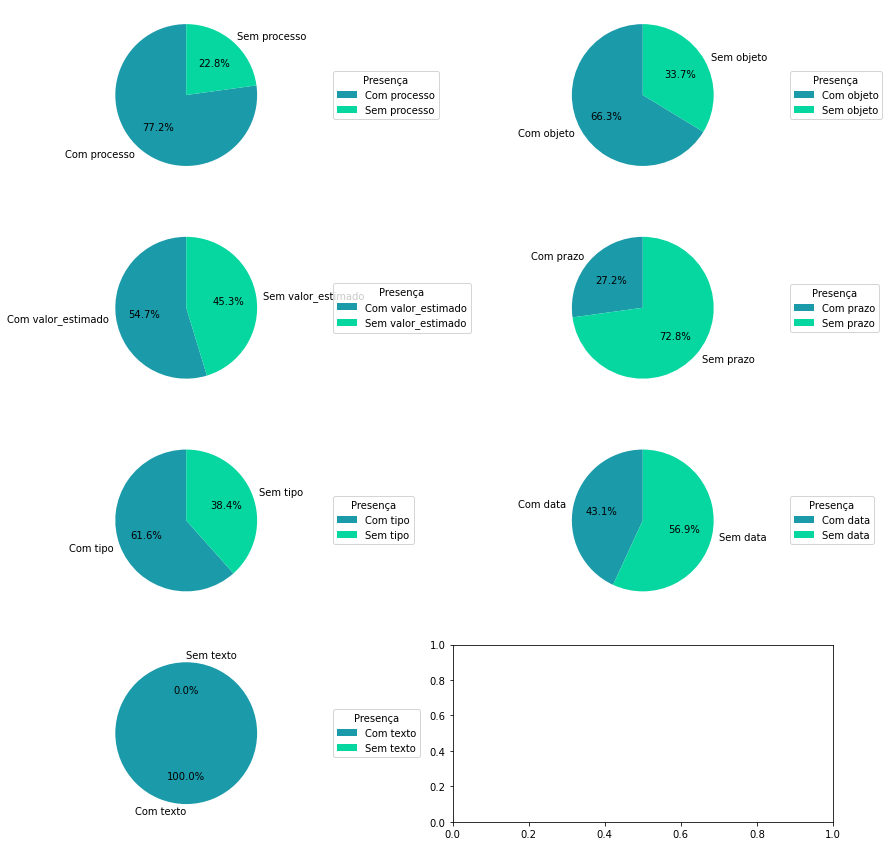

In [10]:
pizza_plots(df, 4, 2)

In [11]:
for contract in all_contracts_blocks:
    df_dict_block['texto'].append(contract)
    for field in regex_dict:
        match = re.search(regex_dict[field], contract, re.IGNORECASE)
        if match:
            res = tuple(x for x in match.groups() if x is not None)
            df_dict_block[field].append(res[0])
        else:
            df_dict_block[field].append(np.nan)

df = pd.DataFrame.from_dict(df_dict_block)
df.to_csv('abertura_regex_block.csv')
df

,processo,objeto,valor_estimado,prazo,tipo,data,texto


Index(['processo', 'objeto', 'valor_estimado', 'prazo', 'tipo', 'data',
       'texto'],
      dtype='object')


<ipython-input-2-f8037c28c741>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)


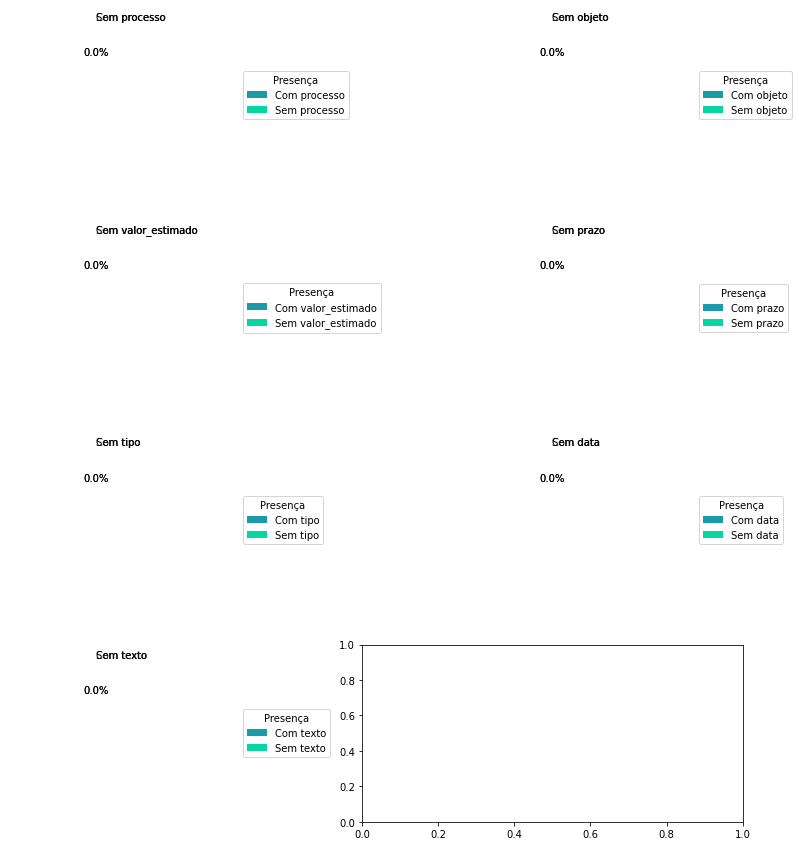

In [12]:
pizza_plots(df, 4, 2)